# **Install required libraries**

In [ ]:
!pip install pyspark
!pip install matplotlib seaborn scikit-learn


# **Load the Dataset**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Crime Data Analysis") \
    .getOrCreate()

# Load the crime dataset
file_path = "/content/crime_data.csv"
crime_data = spark.read.csv(file_path, header=True, inferSchema=True)

# Print column names to verify them
print("Columns in the dataset:", crime_data.columns)

# Selecting relevant columns (use exact names from the dataset)
relevant_columns = ['date', 'primary_type', 'latitude', 'longitude']
crime_data = crime_data.select([col(c) for c in relevant_columns])

# Drop rows with missing values
crime_data = crime_data.dropna()

# Show the cleaned dataset
crime_data.show(5)


Columns in the dataset: ['id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude', 'location']
+-------------------+---------------+------------+-------------+
|               date|   primary_type|    latitude|    longitude|
+-------------------+---------------+------------+-------------+
|2023-12-31 23:59:00|CRIMINAL DAMAGE|41.900698378|-87.637329754|
|2023-12-31 23:51:00|        ASSAULT|41.754966726|-87.602410989|
|2023-12-31 23:51:00|        ASSAULT|41.801583507|-87.633177068|
|2023-12-31 23:50:00|        BATTERY|41.906519104|-87.758359629|
|2023-12-31 23:50:00|        BATTERY|41.800200965|-87.691535096|
+-------------------+---------------+------------+-------------+
only showing top 5 rows



# **Data Preprocessing**

In [ ]:
from pyspark.sql.functions import col

# Selecting relevant columns
relevant_columns = ['date', 'primary_type', 'latitude', 'longitude']
crime_data = crime_data.select([col(c) for c in relevant_columns])

# Drop rows with missing values
crime_data = crime_data.dropna()
crime_data.show(5)


+-------------------+---------------+------------+-------------+
|               date|   primary_type|    latitude|    longitude|
+-------------------+---------------+------------+-------------+
|2023-12-31 23:59:00|CRIMINAL DAMAGE|41.900698378|-87.637329754|
|2023-12-31 23:51:00|        ASSAULT|41.754966726|-87.602410989|
|2023-12-31 23:51:00|        ASSAULT|41.801583507|-87.633177068|
|2023-12-31 23:50:00|        BATTERY|41.906519104|-87.758359629|
|2023-12-31 23:50:00|        BATTERY|41.800200965|-87.691535096|
+-------------------+---------------+------------+-------------+
only showing top 5 rows



# **Exploratory Data Analysis (EDA)**

In [ ]:
crime_data.groupBy('primary_type').count().show()


+--------------------+-----+
|        primary_type|count|
+--------------------+-----+
|OFFENSE INVOLVING...|   53|
|CRIMINAL SEXUAL A...|   46|
|            STALKING|   18|
|PUBLIC PEACE VIOL...|   32|
|           OBSCENITY|    1|
|               ARSON|   26|
|   CRIMINAL TRESPASS|  174|
|             ASSAULT|  877|
|LIQUOR LAW VIOLATION|    7|
| MOTOR VEHICLE THEFT| 1065|
|               THEFT| 2366|
|             BATTERY| 1685|
|             ROBBERY|  445|
|            HOMICIDE|   17|
|    PUBLIC INDECENCY|    1|
|        INTIMIDATION|    4|
|        PROSTITUTION|    3|
|  DECEPTIVE PRACTICE|  540|
|CONCEALED CARRY L...|    5|
|         SEX OFFENSE|   40|
+--------------------+-----+
only showing top 20 rows



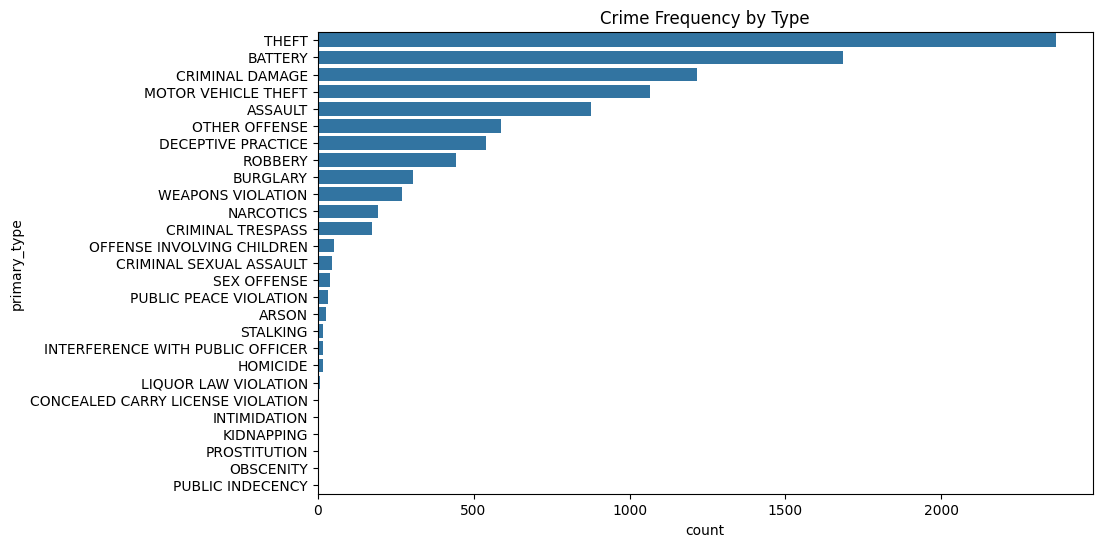

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas for visualization
crime_pd = crime_data.toPandas()

plt.figure(figsize=(10, 6))
sns.countplot(data=crime_pd, y='primary_type', order=crime_pd['primary_type'].value_counts().index)
plt.title("Crime Frequency by Type")
plt.show()


# **Clustering for Hotspot Detection**

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Extract coordinates
coordinates = crime_pd[['latitude', 'longitude']].dropna()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(coordinates)

# Add cluster labels to data
crime_pd['Cluster'] = kmeans.labels_


# **7. Visualization of Crime Hotspots**

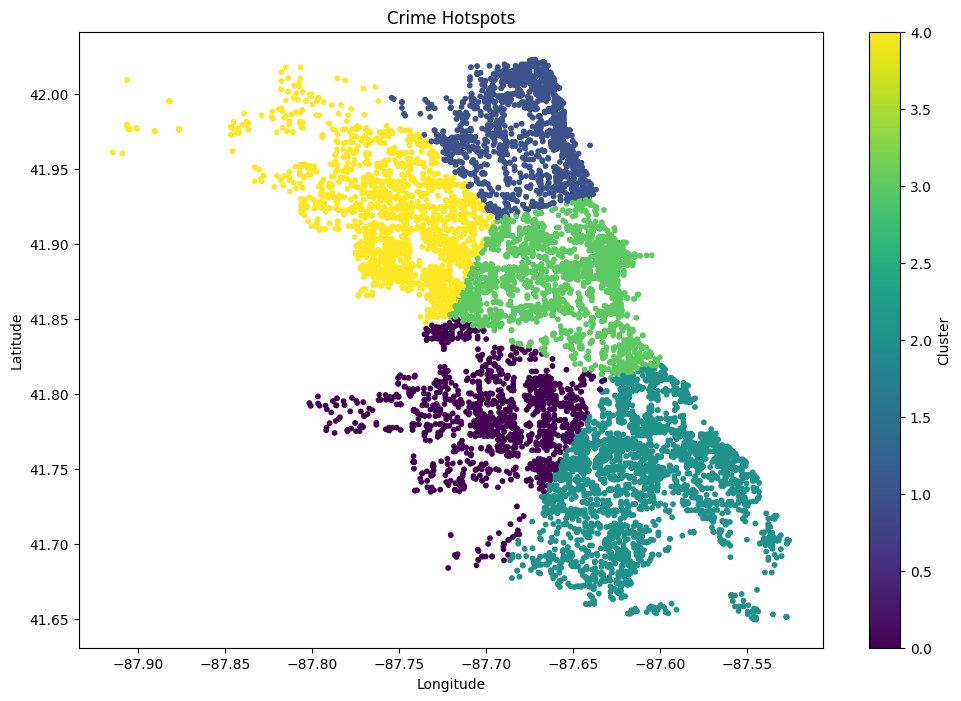

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(coordinates['longitude'], coordinates['latitude'], c=kmeans.labels_, cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title("Crime Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# **8. Save and Export Results**

In [ ]:
crime_pd.to_csv("crime_clusters.csv", index=False)


# **Deploy Insights**

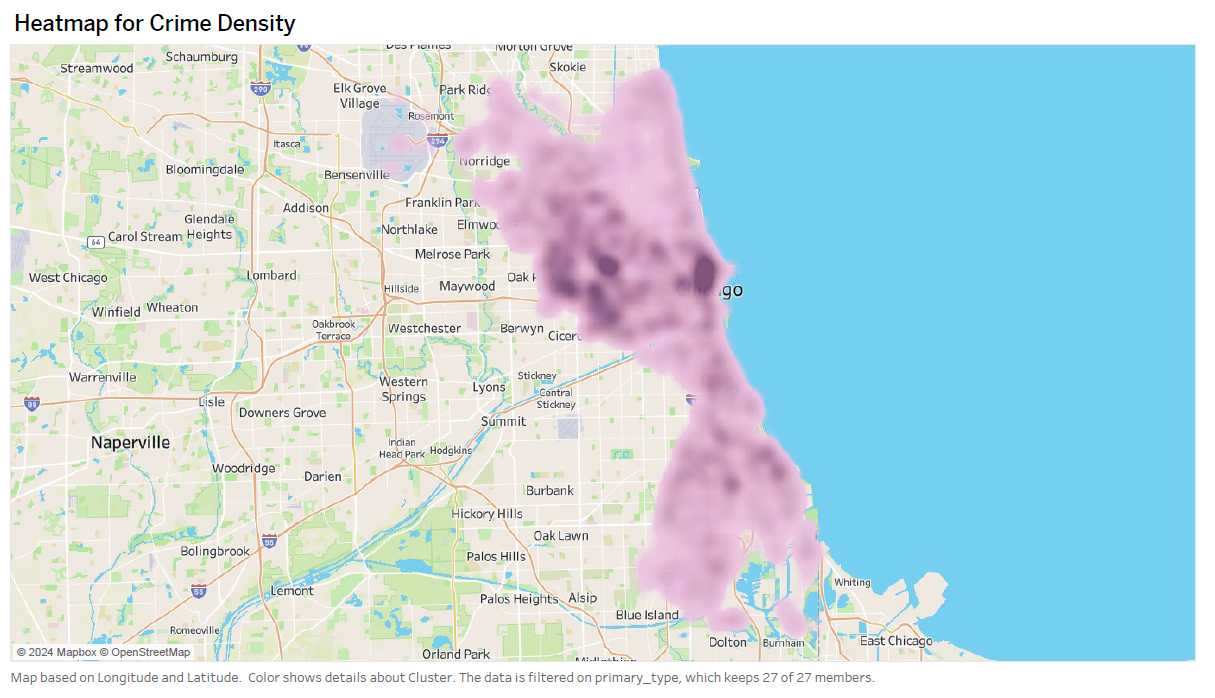

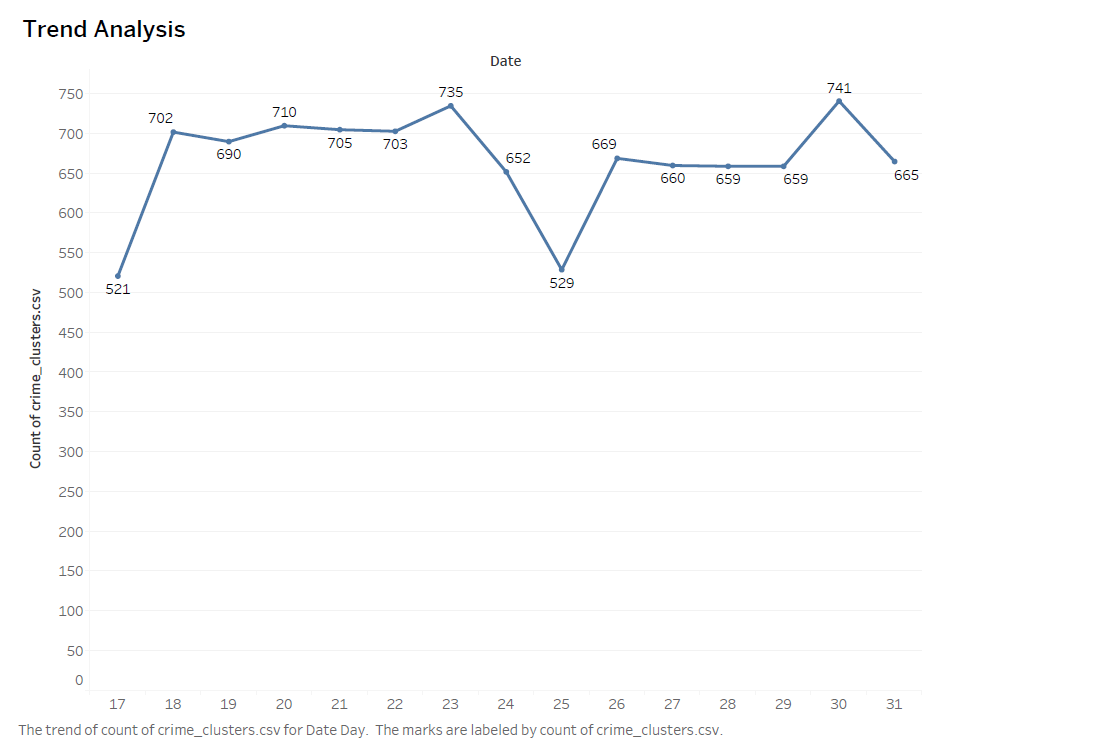

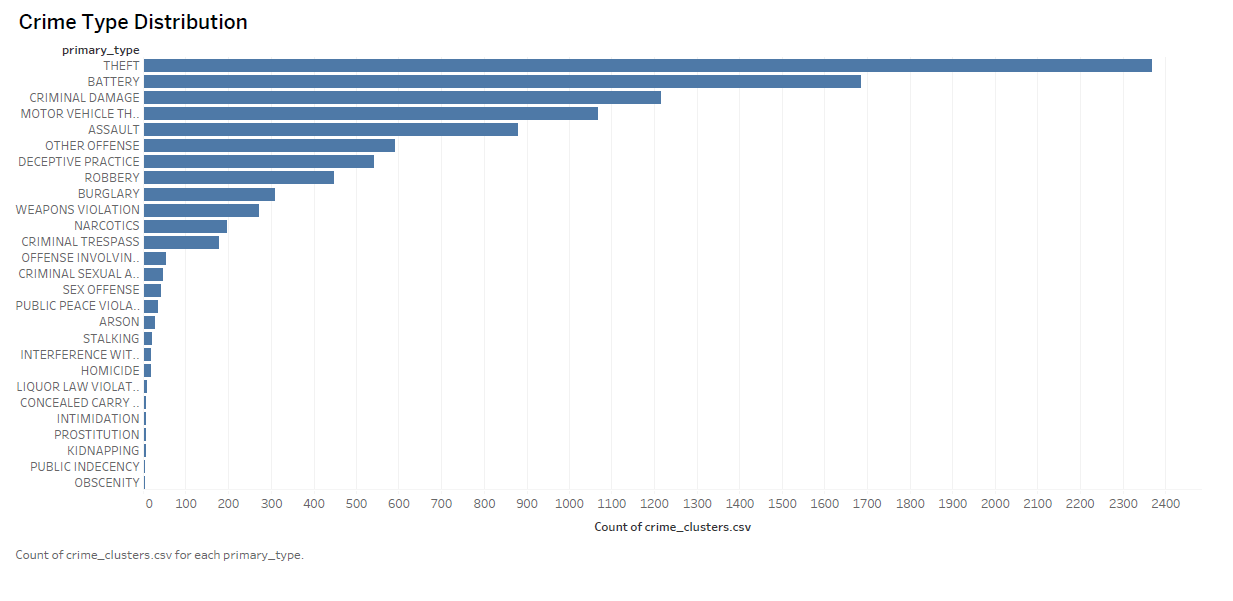

# **DASHBOARD**

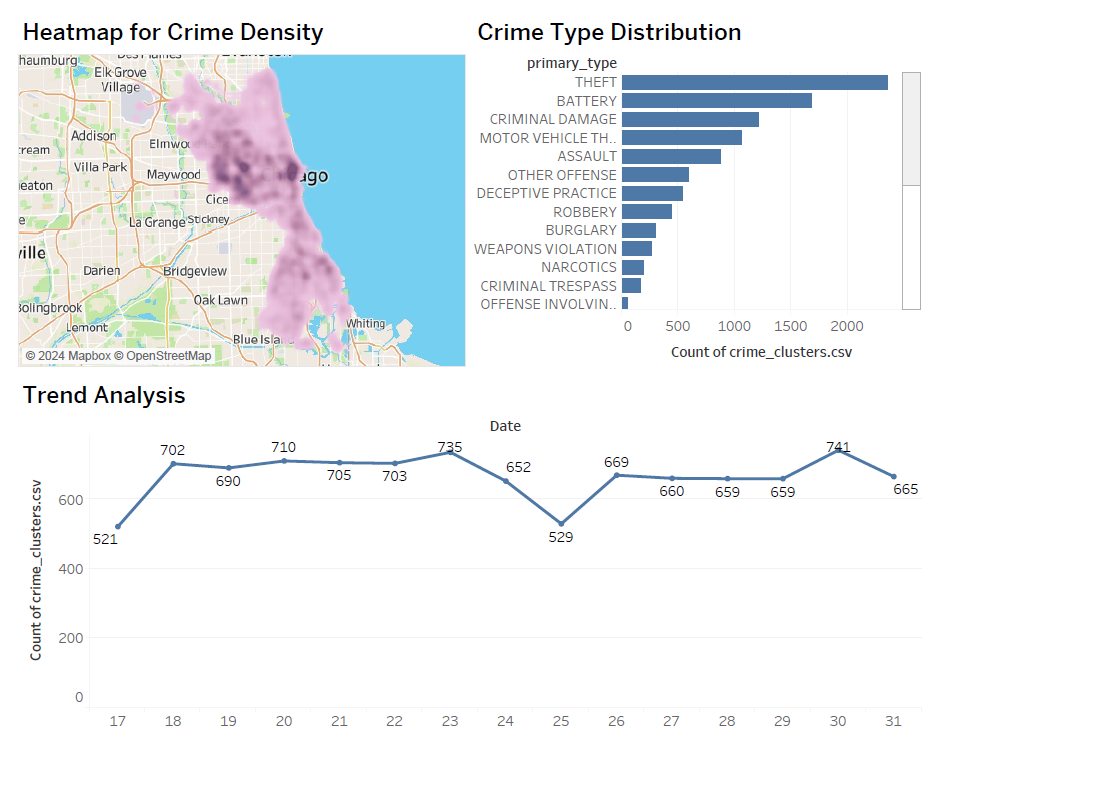